<a href="https://colab.research.google.com/github/irdinainsharuki/AdvancedMLBCNittanyAi/blob/main/Project%201%20-%20Data%20Preprocessing%20and%20Whitebox%20model%20training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
# Libary imports can go here. As always, you can import more as needed!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [132]:
# Loads the file
file = "corrupted_titanic_data.csv"
df = pd.read_csv(file)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,pclass_redundant,fare_age_combination
0,0,3,male,22.0,1,0,NaN,c,Third,man,True,NaN,Southampton,no,False,3,NaN
1,1,1,FEMALE,456.0,1,0,71.312403,NaN,First,woman,False,C,Cherbourg,yes,False,1,32518.455635
2,1,3,female,26.0,0,0,NaN,S,Third,woman,False,NaN,Southampton,yes,True,3,NaN
3,1,1,female,420.0,1,0,53.284868,S,First,woman,False,C,Southampton,yes,False,1,22379.644511
4,0,3,male,35.0,0,0,NaN,S,Third,man,True,NaN,Southampton,no,True,3,NaN


In [133]:
# <------------ TODO ----------------------->
# Drop all the rows with null values
# (TIP: make sure to reset the index after dropping)
df = df.dropna().reset_index(drop=True)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,pclass_redundant,fare_age_combination
0,1,1,female,420.0,1,0,53.284868,S,First,woman,False,C,Southampton,yes,False,1,22379.644511
1,0,1,male,54.0,0,0,51.314334,S,First,man,True,E,Southampton,no,True,1,2770.974017
2,1,2,male,34.0,0,0,13.553364,s,Second,man,True,D,Southampton,yes,True,2,460.814361
3,0,1,male,19.0,3,2,263.176986,s,First,man,True,C,Southampton,no,False,1,5000.362740
4,1,1,FEMALE,23.0,3,2,262.789833,C,First,woman,False,C,Southampton,yes,False,1,6044.166161


In [134]:
# <------------ TODO ----------------------->
# Drop all the feature columns that you may think are not neccessary for the models evaluation
# (HINT: around 6-8 columns!)
columns_to_drop = ["pclass_redundant", "pclass", "adult_male", "sibsp", "embark_town", "alive", "parch", "who"]
df = df.drop(columns=columns_to_drop)
df.head()


,survived,sex,age,fare,embarked,class,deck,alone,fare_age_combination
0,1,female,420.0,53.284868,S,First,C,False,22379.644511
1,0,male,54.0,51.314334,S,First,E,True,2770.974017
2,1,male,34.0,13.553364,s,Second,D,True,460.814361
3,0,male,19.0,263.176986,s,First,C,False,5000.362740
4,1,FEMALE,23.0,262.789833,C,First,C,False,6044.166161


In [135]:
# <------------ TODO ----------------------->
# Clean any relevant columns here
# (TIP: Pay attention to the values in the column)
df['age']=df['age'].astype(int)
df = df.dropna(subset=['age']).reset_index(drop=True)
df.head()


,survived,sex,age,fare,embarked,class,deck,alone,fare_age_combination
0,1,female,420,53.284868,S,First,C,False,22379.644511
1,0,male,54,51.314334,S,First,E,True,2770.974017
2,1,male,34,13.553364,s,Second,D,True,460.814361
3,0,male,19,263.176986,s,First,C,False,5000.362740
4,1,FEMALE,23,262.789833,C,First,C,False,6044.166161


In [136]:
# <------------ TODO ----------------------->
# Encode all the text values to numeric ones
# (TIP: Double check your final dataframe at this point before moving on)
df['sex'] = df['sex'].map({'male':0, 'female':1})
df['embarked'] = df['embarked'].map({'S':0, 'C':1, 'Q':2})
df['deck'] = df['deck'].map({'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6})
df['alone'] = df['alone'].map({False:0, True:1})
df['class'] = df['class'].map({'First':0, 'Second':1, 'Third':2})
df = df.dropna(subset=['sex','embarked','deck']).reset_index(drop=True)
df =  df.drop_duplicates().reset_index(drop=True)
df.head()

,survived,sex,age,fare,embarked,class,deck,alone,fare_age_combination
0,1,1.0,420,53.284868,0.0,0,2,0,22379.644511
1,0,0.0,54,51.314334,0.0,0,4,1,2770.974017
2,0,0.0,71,34.994854,0.0,0,0,1,2484.634644
3,0,0.0,47,52.148910,0.0,0,2,1,2450.998774
4,0,0.0,54,77.001331,2.0,0,3,0,4158.071894


Model Accuracy: 0.80

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.40      0.57         5
           1       0.77      1.00      0.87        10

    accuracy                           0.80        15
   macro avg       0.88      0.70      0.72        15
weighted avg       0.85      0.80      0.77        15


Confusion Matrix:
 [[ 2  3]
 [ 0 10]]


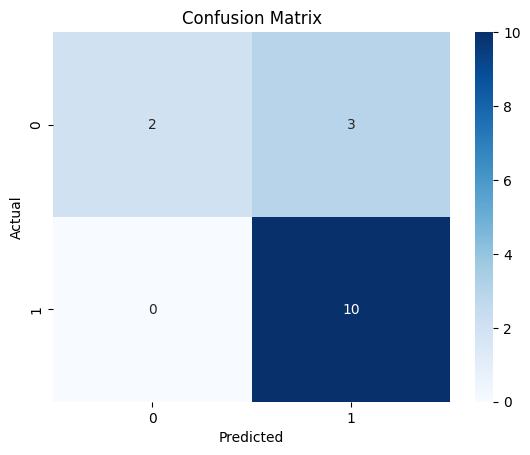

In [137]:
# <------------ TODO ----------------------->
# Create and train a classification model of your choosing
# Print the accuracy, classification report, and the confusion matrix

# Define target variable (assuming 'survived' is the target column)
y = df["survived"]
X = df.drop(columns=["survived"])

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print model performance metrics
print(f"Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", conf_matrix)

# Visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()